# Vulnerability in the Philippines (In the context of Tropical Cyclones)

A known problem of the Philippines context is the spatial opposing gradients for hazard and vulnerability. This 
challenges decision making for aid allocation. In this notebook, the aim is to understand the characteristics of 
vulnerability in the Philippines. [How and why?]

## The Dataset(s)

We have two datasets to compare. One includes income classes on municipalities and the original dataset from 510. The former
has some missing observations on the income classes which lowers
the sample size by a number of municipalities.

In [70]:
# libaries for handling data and visualization
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_boxplot, labs, theme_minimal, geom_bar, stat_summary

In [3]:
# loading combined_input_data (base dataframe)
path_base_df = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/data/combined_input_data.csv'

base_df = pd.read_csv(path_base_df, header = 0)

base_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_StrongRoof_SalvageWall,VUL_LightRoof_StrongWall,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,0.097425,2.533055,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106,3.632568
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.118842,0.248487,2.182368,0.000000,0.000000,0.010804,0.010804,0.867603,8.967156,NaN
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,0.850008,1.218595,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168,NaN


In [11]:
# loading inc-base

path_inc_base_df = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/data/base_inc_data.csv'

base_inc_df =  pd.read_csv(path_inc_base_df, header = 0)

base_inc_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census)
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.951511,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.867603,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,3.338873,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st*,61216.0


In [28]:
# data correction 
# remove * in income class
## * only means this particular municipality was not reclassified under 
## Department Order No 23-08 due to incomplete data.
base_inc_df['Income Class'] = base_inc_df['Income Class'].str.replace('*', '', regex = False)
base_inc_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census)
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.951511,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.867603,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,3.338873,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st,61216.0


## Distribution of damage among the income classes

/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/2944827328.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/envs/py3-12-5/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 21302 rows containing non-finite values.


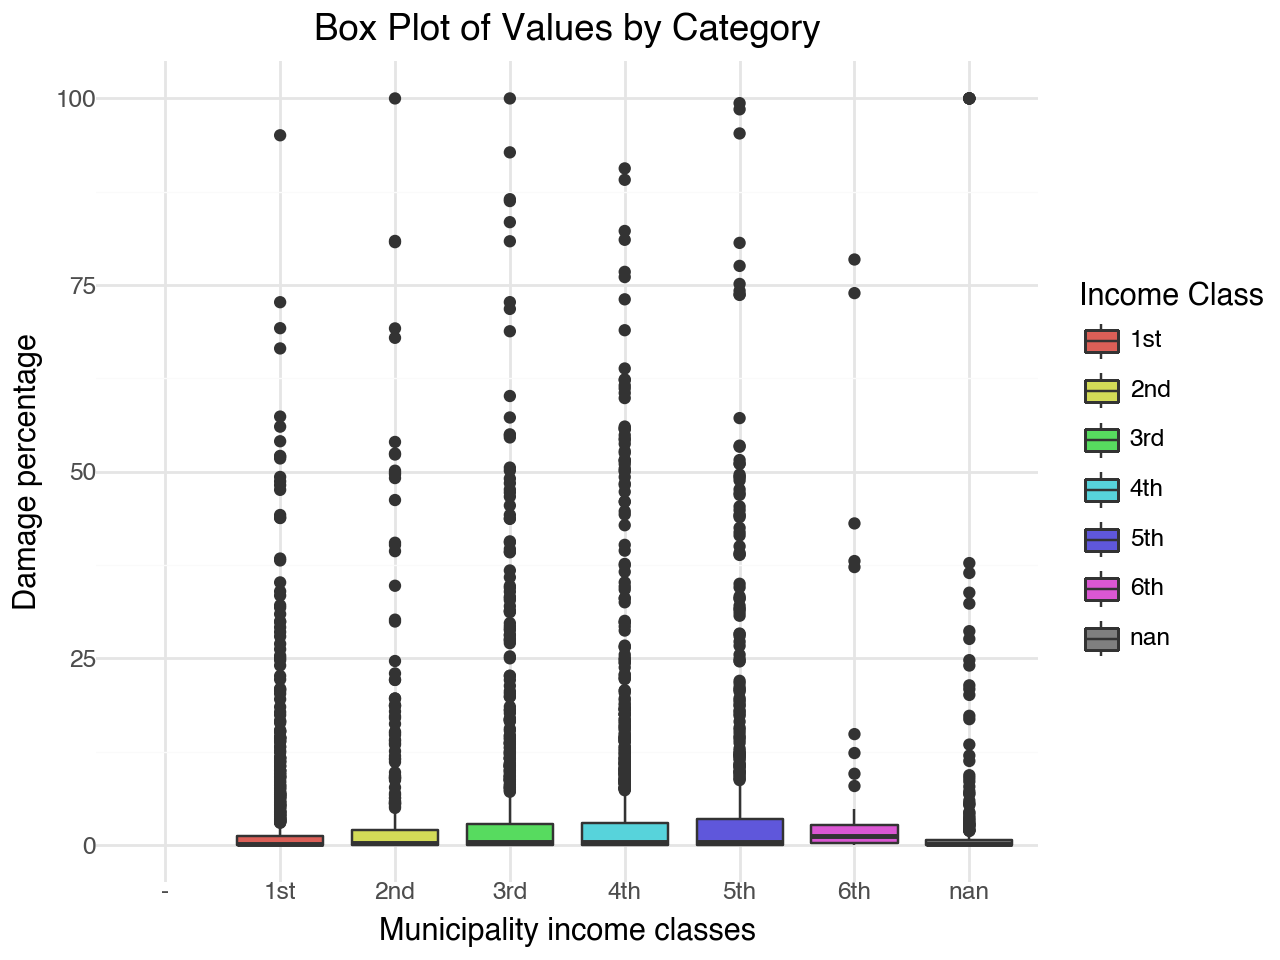

In [40]:
# Create the box plot
plot = (ggplot(base_inc_df, aes(x='Income Class', y='DAM_perc_dmg', fill='Income Class')) +
        geom_boxplot() +
        labs(title='Box Plot of Values by Category',
             x='Municipality income classes',
             y='Damage percentage') +
        theme_minimal())

# Display the plot
print(plot)

/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/1114297317.py:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


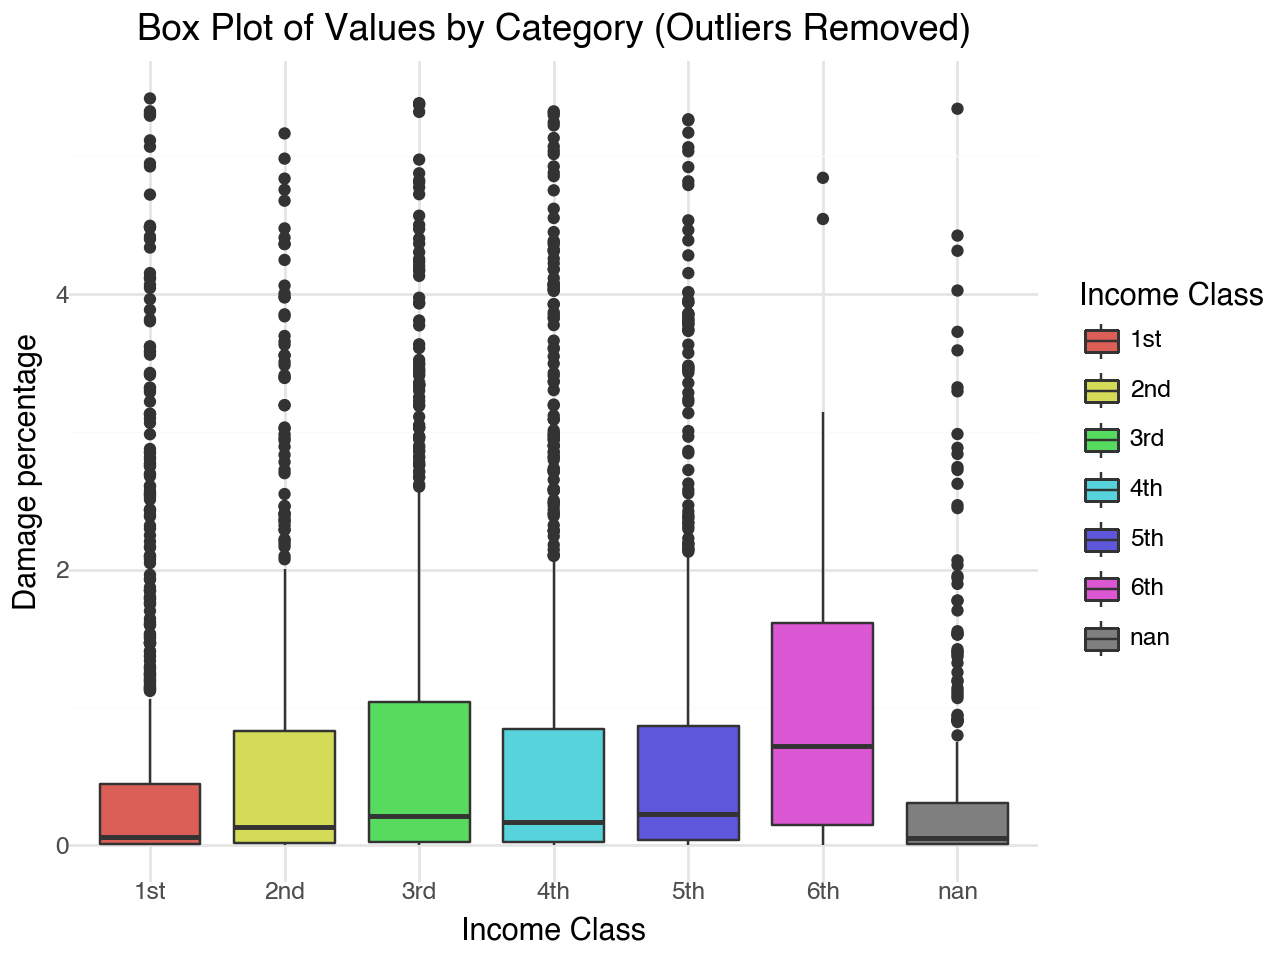

In [38]:
# boxplot without the outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = base_inc_df['DAM_perc_dmg'].quantile(0.25)
Q3 = base_inc_df['DAM_perc_dmg'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = base_inc_df[(base_inc_df['DAM_perc_dmg'] >= lower_bound) & (base_inc_df['DAM_perc_dmg'] <= upper_bound)]

# Create the box plot without outliers
plot = (ggplot(filtered_data, aes(x='Income Class', y='DAM_perc_dmg', fill='Income Class')) +
        geom_boxplot() +
        labs(title='Box Plot of Values by Category (Outliers Removed)',
             x='Income Class',
             y='Damage percentage') +
        theme_minimal())

# Display the plot
print(plot)

## Frequency of tropical cyclones in the municipality income classes

In [47]:
# number of tropical cyclone events...
num_tcs = base_inc_df['typhoon'].nunique()

# Print the results
print(f"Unique observations in column A: {num_tcs}")

Unique observations in column A: 40


/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/617264692.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


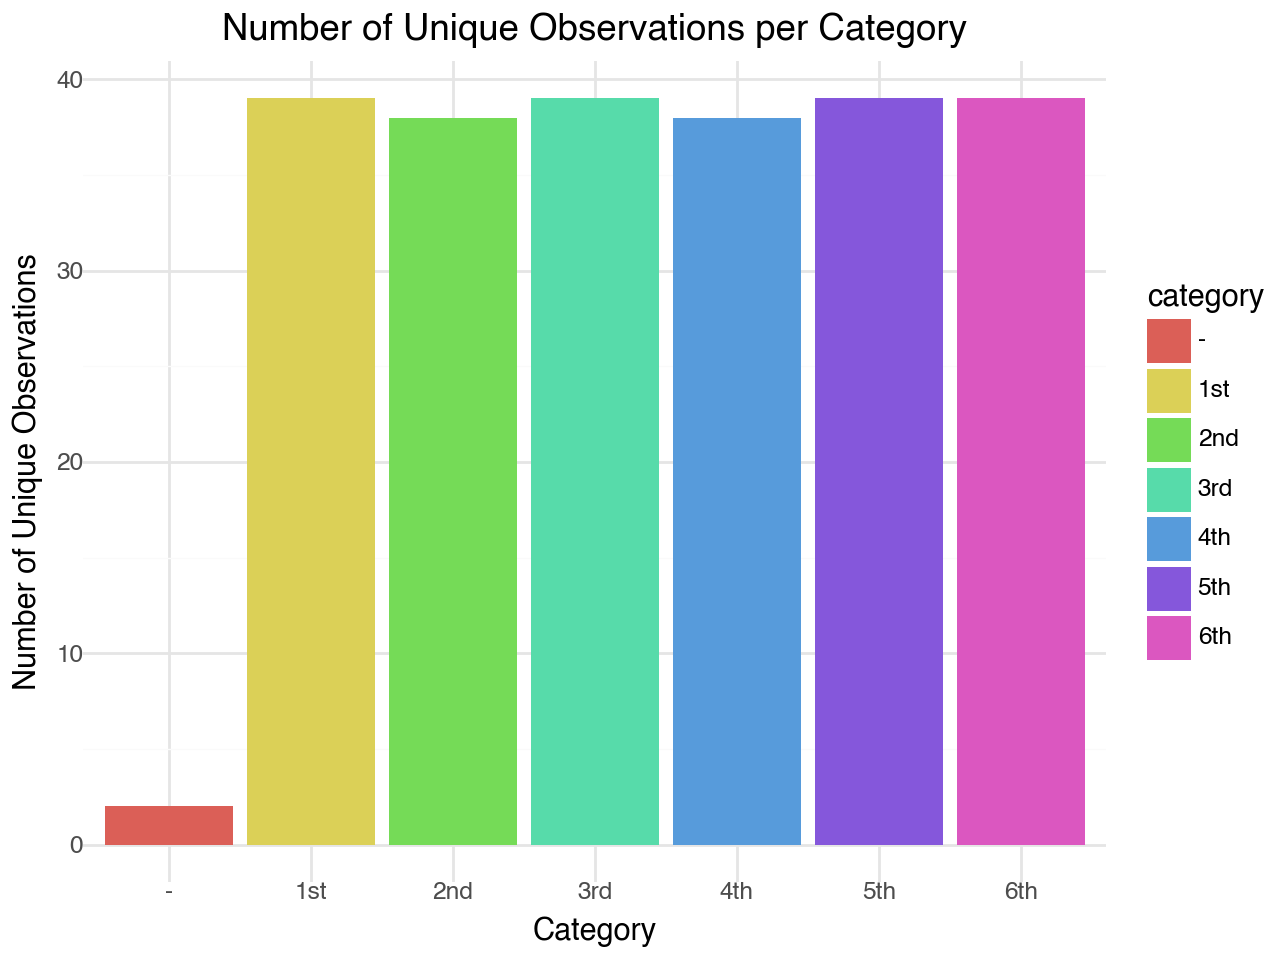

In [57]:
# Count unique observations per category
unique_counts = base_inc_df.groupby('Income Class')['typhoon'].nunique().reset_index()


# Rename the columns for clarity
unique_counts.columns = ['category', 'unique_count']

# Create the bar plot
plot = (ggplot(unique_counts, aes(x='category', y='unique_count', fill='category')) +
        geom_bar(stat='identity') +
        labs(title='Number of Unique Observations per Category',
             x='Category',
             y='Number of Unique Observations') +
        theme_minimal())

# Display the plot
print(plot)

The bar plot above shows that each income class had just about the same number of
TC events.

## Bar plots to try and understand severity (charactersitics) across income classes.

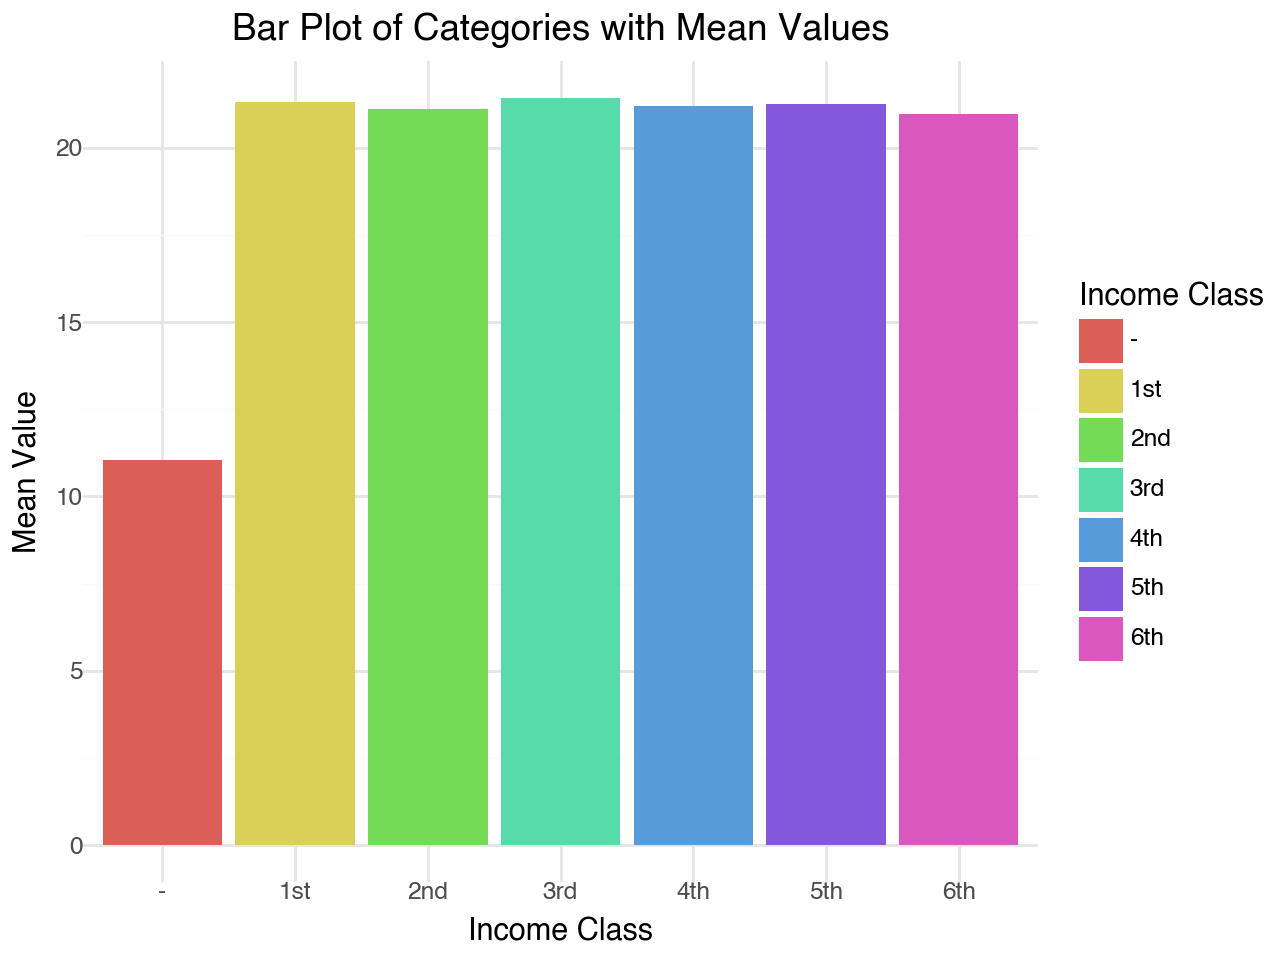

In [98]:
### PLOT DOES NOT MAKE SENSE
# Create a bar plot with the x-axis as a categorical variable and y-axis as a mean
# Summarize by mean for 'Category' and 'Group'
df_mean = base_inc_df.groupby(['Income Class'])['HAZ_v_max'].mean().reset_index()

plot = (ggplot(df_mean, aes(x='Income Class', y='HAZ_v_max', fill = 'Income Class')) +
        geom_bar(stat='identity',  position='dodge') +
       labs(title='Bar Plot of Categories with Mean Values',
             x='Income Class',
             y='Mean Value') +
       theme_minimal())

# Display the plot
plot.show()

Conclusion: Grouping municipalities by income classes in this doesn't tell us much... does it?

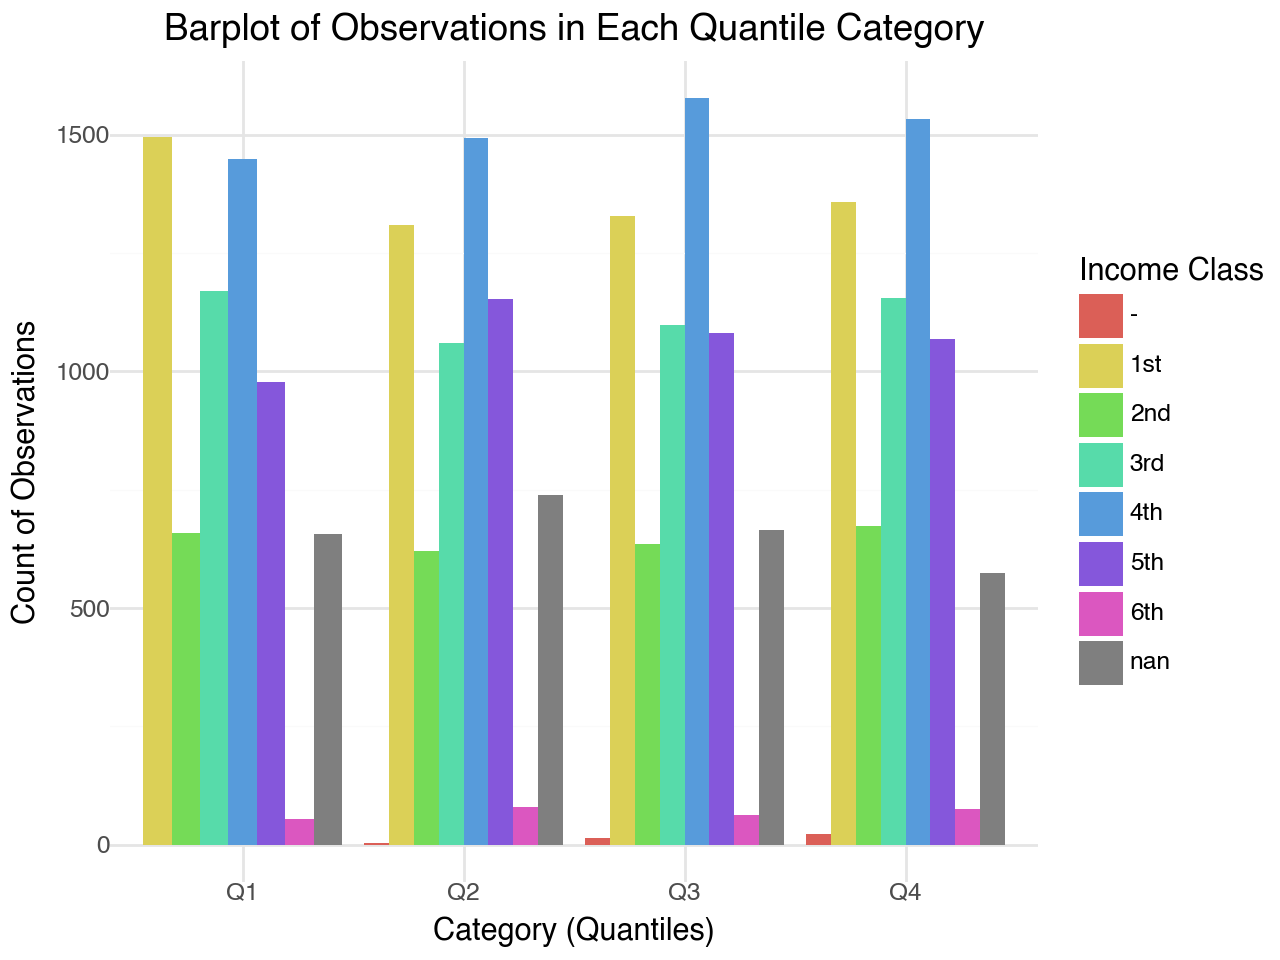

In [127]:
# cut distance into 4 categories based on quantile.
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Create a DataFrame from the sample data
#df = pd.DataFrame(data)

# Create categories using quantiles
base_inc_df['distQ'] = pd.qcut(base_inc_df['HAZ_dis_track_min'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a bar plot counting the number of observations in each category
plot = (ggplot(base_inc_df, aes(x ='distQ', fill = 'Income Class')) +
        geom_bar(position='dodge') +
        labs(title='Barplot of Observations in Each Quantile Category',
             x='Category (Quantiles)', y='Count of Observations') +
        theme_minimal())

# Show the plot
plot.show()

In [121]:
base_inc_df.head(10)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census),distQ
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0,Q1
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0,Q2
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st,61216.0,Q4
3,PH045601000,durian2006,193.083333,13.283333,7.378472,52.891105,41.386956,3.53,2.77,2.77,...,18.821293,NaN,45601000,464.0,Agdangan,4.056010e+08,45601000.0,5th,12764.0,Q1
4,PH015501000,durian2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,32.185651,NaN,15501000,148.0,Agno,1.055010e+08,15501000.0,3rd,29947.0,Q4
5,PH041001000,durian2006,112.300000,8.154167,4.392708,51.137175,47.461548,0.44,0.02,0.02,...,18.741993,NaN,41001000,396.0,Agoncillo,4.010010e+08,41001000.0,4th,39101.0,Q1
6,PH015502000,durian2006,14.930000,1.650000,0.586250,12.108701,252.828578,0.00,0.00,0.00,...,29.612385,NaN,15502000,149.0,Aguilar,1.055020e+08,15502000.0,3rd,45100.0,Q4
7,PH175302000,durian2006,13.550000,1.054167,0.528125,10.660943,258.194381,5.52,0.36,0.36,...,35.052562,NaN,175302000,548.0,Agutaya,1.705302e+09,175302000.0,5th,12867.0,Q4
8,PH063001000,durian2006,24.243750,2.075000,0.677604,8.676614,259.252104,0.23,0.00,0.00,...,24.601217,NaN,63001000,745.0,Ajuy,6.030010e+08,63001000.0,2nd,53462.0,Q4
9,PH045602000,durian2006,172.316667,12.147222,5.927778,36.574351,69.147636,3.78,15.33,15.30,...,21.022888,NaN,45602000,465.0,Alabat,4.056020e+08,45602000.0,5th,15936.0,Q1
